#**PyTorch V**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque

#**Introducción**

PyTorch es un framework de deep learning desarrollado por Facebook AI Research (FAIR) y lanzado en 2016. Su origen se basa en Torch, una biblioteca previa escrita en Lua, pero PyTorch fue diseñado para aprovechar la flexibilidad y eficiencia de Python. Desde su lanzamiento, ha ganado popularidad por su enfoque dinámico en la construcción de modelos de redes neuronales, permitiendo la creación de grafos computacionales en tiempo real, lo que facilita la depuración y experimentación. Gracias a su facilidad de uso y compatibilidad con bibliotecas científicas como NumPy, se ha convertido en una de las principales herramientas en el campo del aprendizaje profundo, compitiendo directamente con TensorFlow y siendo ampliamente adoptado en investigación y producción.

##**Comparación entre PyTorch y TensorFlow**

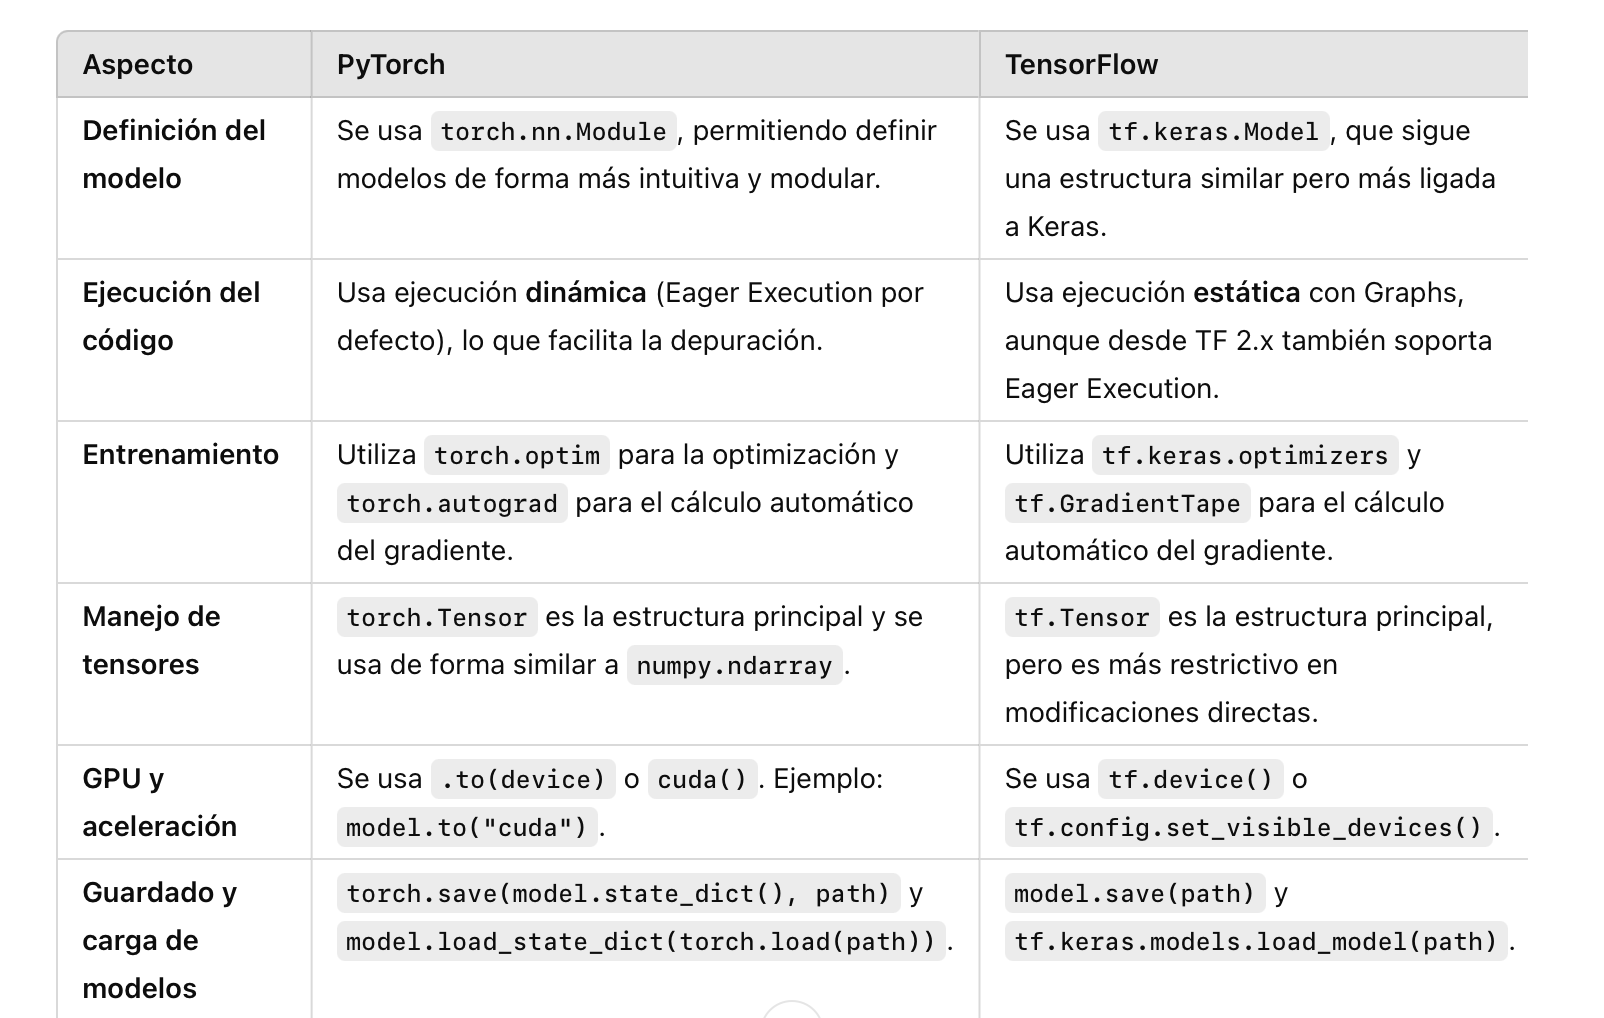

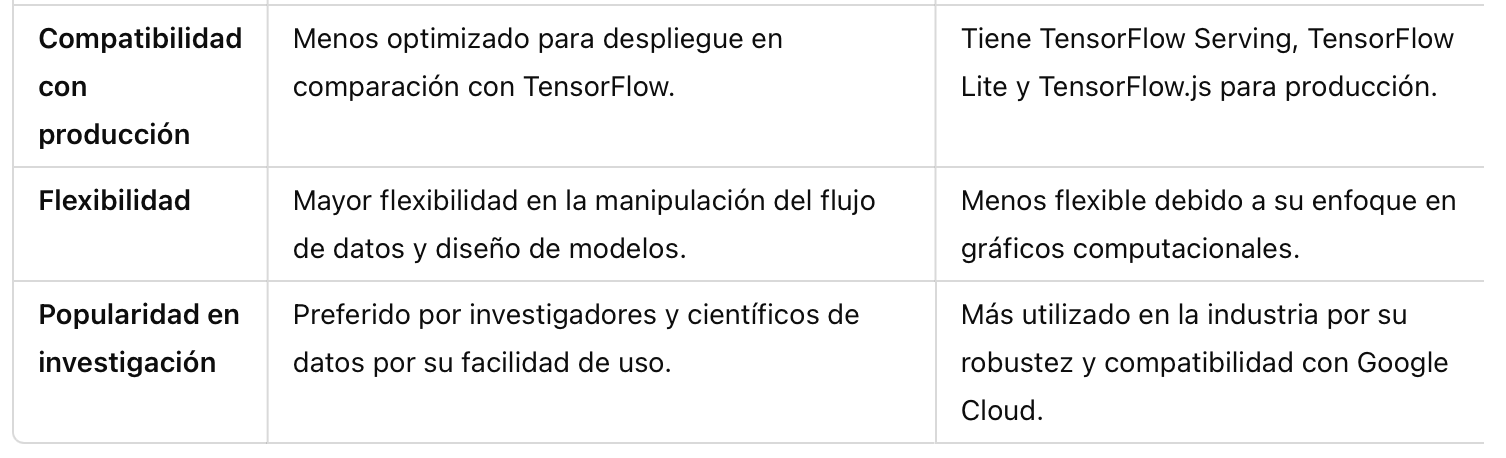

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Verificar versión de PyTorch
print(torch.__version__)

2.6.0+cu124


##**REGRESION LINEAL: Y(x)=w*x+b**

La regresión lineal es un método estadístico que modela la relación entre una variable independiente (x) y una variable dependiente (y) mediante una ecuación lineal de la forma:

y = w * x + b

En este código, generamos datos sintéticos que siguen una distribución lineal con un término de ruido. Posteriormente, utilizamos PyTorch para definir un modelo simple de regresión lineal, que se entrenará ajustando los parámetros `w` y `b` para minimizar el error cuadrático medio (MSE) entre las predicciones y los valores reales.

<ipython-input-4-12cb18c5f7d9>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


,x,y
0,-10.000000,-51.075249
1,-9.933110,-49.092590
2,-9.866220,-48.441387
3,-9.799331,-53.187370
4,-9.732442,-50.363808


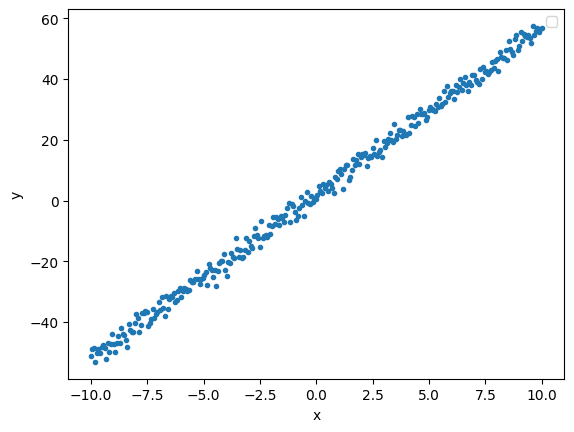

In [ ]:
## Generación de datos
numbers = 300
x = torch.linspace(-10.0, 10.0, numbers)
inter_true = torch.tensor(2.3)
pendi_true = torch.tensor(5.5)
noise = torch.randn(numbers) * 1.9 + 0.001
y = pendi_true * x + inter_true + noise

plt.scatter(x.numpy(), y.numpy(), marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Crear DataFrame
df = pd.DataFrame({'x': x.numpy(), 'y': y.numpy()})
df.head()

**Conversión a PyTorch Dataset**

In [ ]:
pandas_dataset = data.TensorDataset(torch.tensor(df['x'].values, dtype=torch.float32),
                                    torch.tensor(df['y'].values, dtype=torch.float32))

len_df = len(pandas_dataset)
print(len_df)

300


**División del dataset en conjuntos de entrenamiento, validación y prueba**

In [ ]:
def get_dataset_partitions(dataset, train_split=0.8, val_split=0.1, test_split=0.1, batch_size=30):
    assert (train_split + val_split + test_split) == 1

    train_size = int(train_split * len(dataset))
    val_size = int(val_split * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = data.random_split(dataset, [train_size, val_size, test_size])

    train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = get_dataset_partitions(pandas_dataset)

In [ ]:
train_loader, val_loader, test_loader = get_dataset_partitions(pandas_dataset)

**Entrenamiento**

En esta fase, el modelo se entrena utilizando el algoritmo de descenso de gradiente estocástico (SGD). Durante cada época, el modelo procesa los datos de entrenamiento en lotes, calcula las predicciones y evalúa el error mediante la función de pérdida de error cuadrático medio (MSE). Luego, se calculan los gradientes con `backward()` y se actualizan los parámetros `w` y `b` usando el optimizador. Además, en cada iteración se evalúa la pérdida en el conjunto de validación para monitorear el desempeño del modelo. Los valores de pérdida en entrenamiento y validación se almacenan para su posterior análisis. Finalmente, cada 10 épocas se imprimen los valores de `w`, `b` y las pérdidas correspondientes para evaluar la convergencia del modelo.


In [ ]:
## Definir variables
w = torch.tensor(np.random.normal(), dtype=torch.float32, requires_grad=True)
b = torch.tensor(np.random.normal(), dtype=torch.float32, requires_grad=True)

## Salida de la red neuronal (predicción y_pred)
def output_(w, b, x, activation=lambda x: x):
    y_pred = w * x + b
    return activation(y_pred)

## Función de costo: regresión => MSE
def loss_mse(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

Epocas = 45
loss_hist = []
loss_hist_val = []
loss_batch = []
learning_rate = 0.008

optimizer = torch.optim.SGD([w, b], lr=learning_rate)

for st in range(Epocas):  ## Loop de épocas
    for dsx, dsy in train_loader:  ## Loop de datos de entrenamiento
        optimizer.zero_grad()
        y_pred = output_(w, b, dsx)
        loss = loss_mse(y_pred, dsy)
        loss.backward()
        optimizer.step()
        loss_batch.append(loss.item())

    loss_v = []
    for dsx_val, dsy_val in val_loader:  ## Loop de datos de validación
        y_pred_val = output_(w, b, dsx_val)
        loss_batch_val = loss_mse(y_pred_val, dsy_val)
        loss_v.append(loss_batch_val.item())

    loss_val = np.mean(loss_v)
    loss_epoc = np.mean(loss_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)

    if st % 10 == 0:
        print(f'epoch: {st}; loss_mse_train: {loss_epoc}; loss_mse_validation: {loss_val}; w: {w.item()}; b: {b.item()}')

epoch: 0; loss_mse_train: 213.79696840047836; loss_mse_validation: 7.917211055755615; w: 5.460781097412109; b: 0.6027193665504456
epoch: 10; loss_mse_train: 23.810304514386438; loss_mse_validation: 4.701956272125244; w: 5.480438709259033; b: 1.8102195262908936
epoch: 20; loss_mse_train: 14.316838119001616; loss_mse_validation: 4.274135112762451; w: 5.4776434898376465; b: 2.142786741256714
epoch: 30; loss_mse_train: 10.922954904936976; loss_mse_validation: 4.255899429321289; w: 5.488342761993408; b: 2.2378692626953125
epoch: 40; loss_mse_train: 9.182213713846556; loss_mse_validation: 4.106803894042969; w: 5.461703300476074; b: 2.2616257667541504


**Visualización de la función de costo**:
Después del entrenamiento, se grafica la evolución de la función de costo a lo largo de las épocas. Se comparan las pérdidas en el conjunto de entrenamiento y validación para evaluar la convergencia del modelo y detectar posibles problemas de sobreajuste.



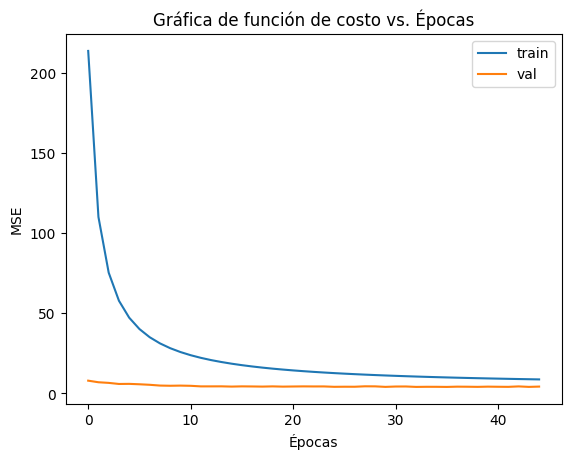

In [ ]:
plt.plot(loss_hist, label='train')
plt.plot(loss_hist_val, label='val')
plt.title('Gráfica de función de costo vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Evaluación en el conjunto de prueba**:
Finalmente, evaluamos el modelo en el conjunto de prueba calculando la función de costo sobre estos datos. Esto nos permite medir la capacidad de generalización del modelo y su desempeño sobre datos no vistos.


In [ ]:
loss_t = []
x_test = []
y_test = []
for dsx_test, dsy_test in test_loader:
    y_pred_test = output_(w, b, dsx_test)
    loss_batch_test = loss_mse(y_pred_test, dsy_test)
    loss_t.append(loss_batch_test.item())
    x_test.append(dsx_test.numpy())
    y_test.append(dsy_test.numpy())

loss_test = np.mean(loss_t)
print("Función de costo para datos de prueba:", loss_test)


Función de costo para datos de prueba: 5.42648983001709


**Predicción de la regresión**
Una vez entrenado el modelo, realizamos la predicción sobre el conjunto de prueba. Se grafican los datos reales y la línea de regresión obtenida para evaluar visualmente la calidad del ajuste.

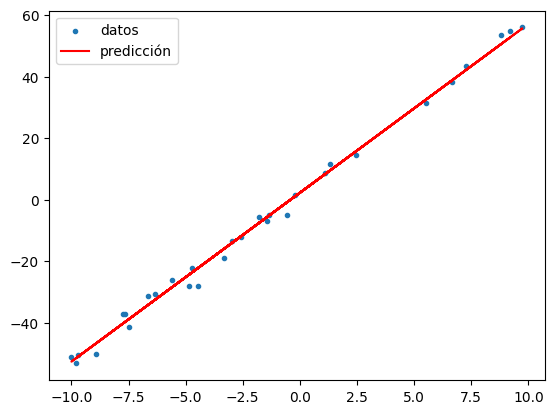

In [ ]:
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
plt.scatter(x_test, y_test, marker='.', label='datos')
plt.plot(x_test, x_test * w.item() + b.item(), color='red', label='predicción')
plt.legend()
plt.show()

**Clasificacion:  $yln(pred) + (1 − y )ln( 1 − pred)$ Cross-entropy**

**Generación datos aleatorios con PyTorch**

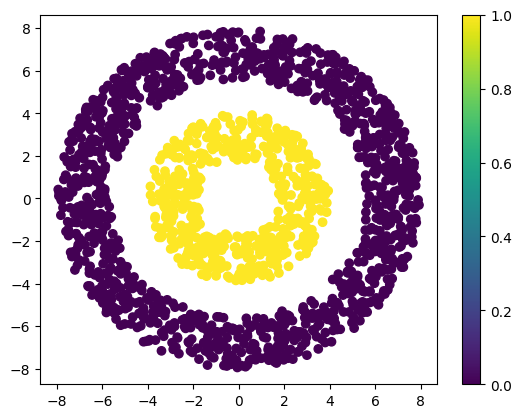

In [ ]:
torch.manual_seed(42)
data_x = torch.FloatTensor(5000, 2).uniform_(-10, 10).numpy()

def label_circle(x, y):
    if 1 * np.sqrt(10) < x**2 + y**2 <= 5 * np.sqrt(10):
        return 1
    elif 20 * np.sqrt(10) >= x**2 + y**2 >= 10 * np.sqrt(10):
        return 0
    else:
        return 2

def squared_circle(x, y):
    return x**2, y**2

# Crear el DataFrame igual que antes
df = pd.DataFrame(data_x, columns=['x0', 'x1'])
df['y'] = df.apply(lambda x: label_circle(x['x0'], x['x1']), axis=1)
df[['x02', 'x12']] = df.apply(lambda x: squared_circle(x['x0'], x['x1']), axis=1, result_type="expand")

# Filtrar y graficar
df = df[df['y'] != 2]
plt.scatter(df['x0'], df['x1'], c=df['y'], cmap='viridis')
plt.colorbar()
plt.show()

**Creamos un DataLoader para manejar el shuffling y batching, en PyTorch el shuffling se hace en el DataLoader, no en el Dataset**

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


NameError: name 'DataLoader' is not defined

In [ ]:
# Simulación de un DataFrame (solo si no tienes df definido)
# df = pd.DataFrame({'x0': [1.0, 2.0, 3.0], 'x1': [4.0, 5.0, 6.0], 'y': [7.0, 8.0, 9.0]})

# Función de preprocesamiento en PyTorch
def preprocess(x, y):
    return x.to(torch.float64), y.to(torch.float64)

# Convertir DataFrame de Pandas a tensores de PyTorch
X_tensor = torch.tensor(df[['x0', 'x1']].values, dtype=torch.float64)
y_tensor = torch.tensor(df['y'].values, dtype=torch.float64)

# Crear un Dataset en PyTorch
dataset = TensorDataset(X_tensor, y_tensor)

# Obtener la cantidad de elementos
len_df = len(dataset)

# Barajar los índices manualmente
indices = torch.randperm(len_df)

# Crear un nuevo Dataset con los datos barajados
X_shuffled = X_tensor[indices]
y_shuffled = y_tensor[indices]
dataset = TensorDataset(X_shuffled, y_shuffled)

# Aplicar transformación (preprocesamiento)
X_shuffled, y_shuffled = preprocess(X_shuffled, y_shuffled)

# Mostrar información del dataset
print("Tamaño del dataset:", len_df)
print(f"Tipos de los elementos: X -> {X_shuffled.dtype}, y -> {y_shuffled.dtype}")


Tamaño del dataset: 1728
Tipos de los elementos: X -> torch.float64, y -> torch.float64


random_split() en lugar de get_dataset_partitions_tf()

En TensorFlow, get_dataset_partitions_tf() divide el dataset en diferentes subconjuntos.

En PyTorch, torch.utils.data.random_split() hace la misma tarea dividiendo el dataset en partes de entrenamiento, validación y prueba.

Se usa DataLoader para manejar los datos en lotes

DataLoader se usa en PyTorch para cargar datos en mini-lotes durante el entrenamiento.

shuffle=True en train_loader asegura que el conjunto de entrenamiento esté barajado en cada época.

In [ ]:
BATCH = 50

# Dividir el dataset en entrenamiento, validación y prueba en PyTorch
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_data_class, val_data_class, test_data_class = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)

# Crear DataLoaders para manejar los lotes
train_loader = DataLoader(train_data_class, batch_size=BATCH, shuffle=True)
val_loader = DataLoader(val_data_class, batch_size=BATCH, shuffle=False)
test_loader = DataLoader(test_data_class, batch_size=BATCH, shuffle=False)


Iteración

In [ ]:
for batch in train_loader:
    X_batch, y_batch = batch
    print(X_batch.shape, y_batch.shape)
    break  # Solo para ver un lote


torch.Size([50, 2]) torch.Size([50])


In [ ]:
# Parámetros
EPOCHS = 100
learning_rate = 0.001

# Historial de pérdidas y precisión
loss_hist = []
loss_hist_val = []
loss_batch = []
acc_batch = []

# Modelo de regresión logística en PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)  # Capa lineal

    def forward(self, x):
        return self.linear(x)  # Sin activación (CrossEntropyLoss incluye Softmax)

# Instancia del modelo (ajustar `num_classes` según el problema)
input_size = X_tensor.shape[1]  # Número de características
num_classes = len(torch.unique(y_tensor))  # Número de clases
model = LogisticRegressionModel(input_size, num_classes)
model = model.double()  # Asegurar compatibilidad con `float64`

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(EPOCHS):
    loss_batch = []
    acc_batch = []

    for dsX, dsy in train_loader:
        dsX, dsy = dsX.to(torch.float64), dsy.to(torch.long)  # Convertir a los tipos correctos

        # Forward pass
        y_pred = model(dsX)  # Ahora tiene la forma (batch_size, num_classes)

        # Calcular pérdida
        loss = criterion(y_pred, dsy)  # `dsy` ya es (batch_size,)
        acc = (torch.argmax(y_pred, dim=1) == dsy).float().mean()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Guardar métricas
        loss_batch.append(loss.item())
        acc_batch.append(acc.item())

    # Evaluación en validación
    loss_v = []
    with torch.no_grad():  # No se necesitan gradientes en validación
        for ds_valX, ds_valy in val_loader:
            ds_valX, ds_valy = ds_valX.to(torch.float64), ds_valy.to(torch.long)

            y_pred_val = model(ds_valX)
            loss_val = criterion(y_pred_val, ds_valy)
            acc = (torch.argmax(y_pred_val, dim=1) == ds_valy).float().mean()

            loss_v.append(loss_val.item())

    # Guardar métricas
    loss_epoc = np.mean(loss_batch)
    acc_epoc = np.mean(acc_batch)
    loss_val = np.mean(loss_v)

    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)

    # Imprimir progreso cada 10 épocas
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}; Loss Train: {loss_epoc}; Loss Val: {loss_val}; Acc Train: {acc_epoc}')


Epoch: 0; Loss Train: 1.2338229449463025; Loss Val: 1.206461680062012; Acc Train: 0.49165178409644533
Epoch: 10; Loss Train: 0.8727022114349833; Loss Val: 0.8724541273670344; Acc Train: 0.2871875007237707
Epoch: 20; Loss Train: 0.802229996634121; Loss Val: 0.8014731355955637; Acc Train: 0.28919642977416515
Epoch: 30; Loss Train: 0.7541084627536557; Loss Val: 0.7528556795957402; Acc Train: 0.28839285565274103
Epoch: 40; Loss Train: 0.7171837522609839; Loss Val: 0.7164046661968073; Acc Train: 0.2879910724503653
Epoch: 50; Loss Train: 0.6893589006708976; Loss Val: 0.6888925438128519; Acc Train: 0.4784821420907974
Epoch: 60; Loss Train: 0.6682353865730247; Loss Val: 0.6680618176621544; Acc Train: 0.7116071496691022
Epoch: 70; Loss Train: 0.6519243879216187; Loss Val: 0.6524410285148834; Acc Train: 0.713214288864817
Epoch: 80; Loss Train: 0.6393555428902864; Loss Val: 0.6406161997338344; Acc Train: 0.7144196459225246
Epoch: 90; Loss Train: 0.6303245540609108; Loss Val: 0.6315596362147186; A

In [ ]:
y_pred_batch = []
y_true = []
x_true = []

# Evaluación en el conjunto de prueba
with torch.no_grad():  # No calcular gradientes
    for ds_testX, ds_testy in test_loader:
        ds_testX, ds_testy = ds_testX.to(torch.float64), ds_testy.to(torch.long)

        y_pred = model(ds_testX)  # Forward pass con el modelo
        y_pred_batch.append(y_pred.cpu().numpy())  # Convertir a numpy
        y_true.append(ds_testy.cpu().numpy())  # Convertir a numpy
        x_true.append(ds_testX.cpu().numpy())  # Convertir a numpy

# Concatenar resultados
y_pred_batch = np.concatenate(y_pred_batch)
y_true = np.concatenate(y_true)
x_true = np.concatenate(x_true)

# Calcular precisión
y_pred_labels = np.argmax(y_pred_batch, axis=1)  # Obtener clase predicha
accuracy_test = np.mean(y_pred_labels == y_true)  # Comparar con etiquetas reales

print(f'Accuracy Test: {accuracy_test}')


Accuracy Test: 0.6436781609195402


In [ ]:
# Convertir listas de tensores a numpy
x_true_np = np.concatenate(x_true)
y_pred_batch_np = np.squeeze(np.concatenate(y_pred_batch))

# Verificar la forma antes de indexar
print("Shape de x_true_np:", x_true_np.shape)
print("Shape de y_pred_batch_np:", y_pred_batch_np.shape)

# Asegurar que x_true_np tenga al menos 2 dimensiones
if x_true_np.ndim == 1:
    x_true_np = x_true_np.reshape(-1, 1)  # Convertir a (N, 1) si es necesario

# Imprimir dimensiones de cada parte
print(x_true_np[:, 0].shape,  # Primera columna de x_true
      x_true_np[:, 1].shape if x_true_np.shape[1] > 1 else "No segunda columna",  # Segunda columna si existe
      y_pred_batch_np.shape)


Shape de x_true_np: (348,)
Shape de y_pred_batch_np: (348,)
(348,) No segunda columna (348,)


In [ ]:
print("x_true_np.shape:", x_true_np.shape)
print("y_pred_batch_np.shape:", y_pred_batch_np.shape)


x_true_np.shape: (348, 1)
y_pred_batch_np.shape: (348,)


Shape de x_true_np antes de reshape: (348,)
Shape de y_pred_batch_np: (348,)


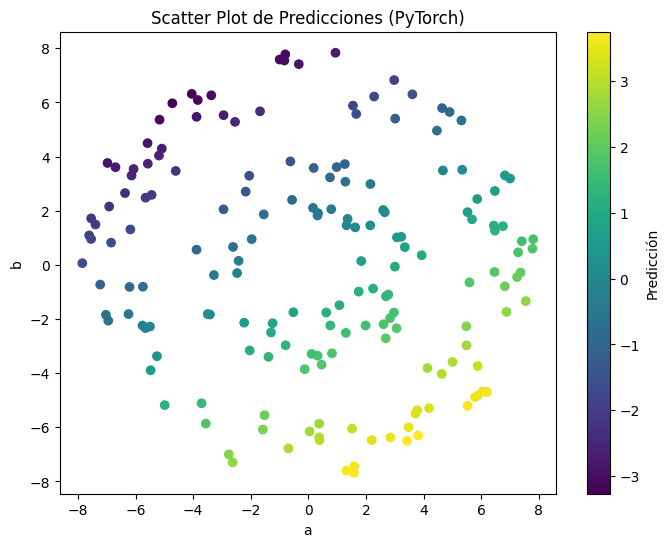

In [ ]:
# Convertir listas de tensores a NumPy
x_true_np = torch.cat([torch.tensor(x) for x in x_true]).numpy()
y_pred_batch_np = torch.cat([torch.tensor(y) for y in y_pred_batch]).squeeze().numpy()

# Verificar shapes
print("Shape de x_true_np antes de reshape:", x_true_np.shape)
print("Shape de y_pred_batch_np:", y_pred_batch_np.shape)

# Si `x_true_np` está 1D, hacer reshape a (N, 2)
if x_true_np.ndim == 1 and x_true_np.shape[0] % 2 == 0:
    x_true_np = x_true_np.reshape(-1, 2)

#Si `y_pred_batch_np` tiene el doble de elementos que `x_true_np`, hacer reshape
if y_pred_batch_np.shape[0] == x_true_np.shape[0] * 2:
    y_pred_batch_np = y_pred_batch_np[::2]  # Tomar un valor cada dos

#  Validar tamaños
if x_true_np.shape[0] != y_pred_batch_np.shape[0]:
    raise ValueError(f"Tamaño incompatible: x_true_np tiene {x_true_np.shape[0]} filas, "
                     f"mientras que y_pred_batch_np tiene {y_pred_batch_np.shape[0]} filas.")

#  Crear DataFrame y graficar
arry = np.column_stack((x_true_np, y_pred_batch_np))  # (N, 3)
df1 = pd.DataFrame(arry, columns=['a', 'b', 'c'])

plt.figure(figsize=(8, 6))
plt.scatter(df1['a'], df1['b'], c=df1['c'], cmap='viridis')
plt.colorbar(label="Predicción")
plt.xlabel("a")
plt.ylabel("b")
plt.title("Scatter Plot de Predicciones (PyTorch)")
plt.show()

##**Creacion de Modelos en TF.keras versus Pytorch**

**Historia e Importancia de Keras en el Desarrollo de Redes Neuronales**

Keras es una API de alto nivel para la construcción y entrenamiento de redes neuronales, diseñada para ser fácil de usar y modular. Fue desarrollada originalmente por François Chollet en 2015 como una interfaz para Theano y TensorFlow. Con el tiempo, Keras se convirtió en la API oficial de alto nivel de TensorFlow, facilitando la construcción de modelos de aprendizaje profundo sin necesidad de definir explícitamente operaciones a nivel de tensores.

Keras es más fácil de usar, con alto nivel de abstracción.

PyTorch ofrece más control y flexibilidad, pero requiere definir el entrenamiento manualmente.

**Regresion**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Datos de ejemplo (suponiendo que train_data es una lista de valores)
train_data = [[1.0], [2.0], [3.0], [4.0], [5.0]]
train_targets = [[2.0], [4.0], [6.0], [8.0], [10.0]]  # Suponiendo una relación lineal Y = 2X

# Convertir los datos a tensores
train_data = torch.tensor(train_data, dtype=torch.float32)
train_targets = torch.tensor(train_targets, dtype=torch.float32)

# Definir el modelo en PyTorch
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Capa densa (equivalente a Dense(1) en Keras)

    def forward(self, x):
        return self.linear(x)

# Instanciar el modelo
model = SimpleModel()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Definir R² (coeficiente de determinación)
def R_squared(y, y_pred):
    residual = torch.sum((y - y_pred) ** 2)
    total = torch.sum((y - torch.mean(y)) ** 2)
    r2 = 1 - (residual / total)
    return r2

# Entrenamiento del modelo
epochs = 2
for epoch in range(epochs):
    optimizer.zero_grad()  # Reiniciar gradientes
    outputs = model(train_data)  # Predicción
    loss = criterion(outputs, train_targets)  # Calcular la pérdida
    loss.backward()  # Retropropagación
    optimizer.step()  # Actualizar los pesos

    r2_score = R_squared(train_targets, outputs).item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, R²: {r2_score:.4f}")

# Obtener los pesos del modelo
weights = [param.data.numpy() for param in model.parameters()]
print("Pesos del modelo:", weights)


Epoch [1/2], Loss: 79.9547, R²: -8.9943
Epoch [2/2], Loss: 46.5984, R²: -4.8248
Pesos del modelo: [array([[0.470901]], dtype=float32), array([-0.15439525], dtype=float32)]


En PyTorch, model.summary() no existe de forma nativa como en Keras. Para obtener una descripción similar del modelo, puedes usar torchinfo o inspeccionar manualmente los parámetros del modelo.

In [ ]:
pip install torchinfo


In [ ]:
from torchinfo import summary
summary(model, input_size=(1, 1))


Layer (type:depth-idx)                   Output Shape              Param #
SimpleModel                              [1, 1]                    --
├─Linear: 1-1                            [1, 1]                    2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

**Clasificacion**

In [ ]:
# Definir el modelo en PyTorch
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.square = lambda x: x ** 2  # Operación lambda para elevar al cuadrado
        self.linear = nn.Linear(2, 1)   # Capa densa
        self.sigmoid = nn.Sigmoid()     # Activación sigmoide

    def forward(self, x):
        x = self.square(x)  # Aplicar x^2
        x = self.linear(x)  # Pasar por la capa lineal
        x = self.sigmoid(x) # Aplicar activación sigmoide
        return x

# Instanciar el modelo
model = SimpleModel()

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()  # Pérdida para clasificación binaria
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Datos de ejemplo (sustituir con tus datos reales)
train_data_class = torch.rand((100, 2))  # 100 muestras, 2 características
train_labels = torch.randint(0, 2, (100, 1)).float()  # Etiquetas binarias (0 o 1)

val_data_class = torch.rand((20, 2))  # 20 muestras de validación
val_labels = torch.randint(0, 2, (20, 1)).float()

# Entrenamiento del modelo
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()  # Reiniciar gradientes
    outputs = model(train_data_class)  # Predicción
    loss = criterion(outputs, train_labels)  # Calcular la pérdida
    loss.backward()  # Retropropagación
    optimizer.step()  # Actualizar los pesos

    # Calcular precisión (accuracy)
    with torch.no_grad():
        predictions = (outputs >= 0.5).float()  # Convertir a 0 o 1
        accuracy = (predictions == train_labels).float().mean()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}")

# Evaluación en datos de validación
with torch.no_grad():
    val_outputs = model(val_data_class)
    val_loss = criterion(val_outputs, val_labels)
    val_predictions = (val_outputs >= 0.5).float()
    val_accuracy = (val_predictions == val_labels).float().mean()

print(f"Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy.item():.4f}")


Epoch [1/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [2/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [3/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [4/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [5/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [6/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [7/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [8/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [9/10], Loss: 0.7071, Accuracy: 0.4800
Epoch [10/10], Loss: 0.7071, Accuracy: 0.4800
Validation Loss: 0.7368, Validation Accuracy: 0.3500


In [ ]:
from torchinfo import summary
summary(model, input_size=(1, 2))  # 1 muestra, 2 características


Layer (type:depth-idx)                   Output Shape              Param #
SimpleModel                              [1, 1]                    --
├─Linear: 1-1                            [1, 1]                    3
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

**Diferencias con Keras**:
En Keras, history.history['loss'] y history.history['val_loss'] están disponibles automáticamente después de model.fit().

En PyTorch se debe almacenar manualmente la pérdida en listas dentro del bucle de entrenamiento.

Epoch [1/10], Train Loss: 0.7071, Val Loss: 0.7368
Epoch [2/10], Train Loss: 0.7070, Val Loss: 0.7368
Epoch [3/10], Train Loss: 0.7070, Val Loss: 0.7368
Epoch [4/10], Train Loss: 0.7070, Val Loss: 0.7368
Epoch [5/10], Train Loss: 0.7070, Val Loss: 0.7367
Epoch [6/10], Train Loss: 0.7070, Val Loss: 0.7367
Epoch [7/10], Train Loss: 0.7070, Val Loss: 0.7367
Epoch [8/10], Train Loss: 0.7070, Val Loss: 0.7367
Epoch [9/10], Train Loss: 0.7070, Val Loss: 0.7366
Epoch [10/10], Train Loss: 0.7070, Val Loss: 0.7366


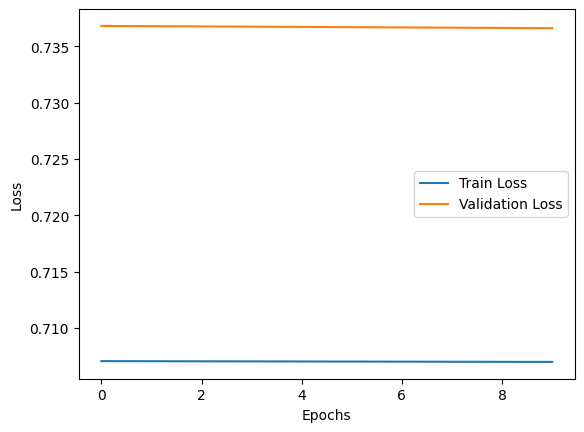

In [ ]:
import matplotlib.pyplot as plt

# Listas para almacenar la pérdida y la precisión
train_losses = []
val_losses = []

epochs = 10
for epoch in range(epochs):
    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    outputs = model(train_data_class)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Guardar pérdida de entrenamiento

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_data_class)
        val_loss = criterion(val_outputs, val_labels)
        val_losses.append(val_loss.item())  # Guardar pérdida de validación

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Graficar la pérdida
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Keras: history.history['accuracy'] y history.history['val_accuracy'] están disponibles automáticamente después de model.fit().

PyTorch: Debemos calcular la precisión manualmente y almacenarla en listas (train_accuracies y val_accuracies).

Epoch [1/10], Train Loss: 0.7070, Train Acc: 0.4800, Val Loss: 0.7366, Val Acc: 0.3500
Epoch [2/10], Train Loss: 0.7070, Train Acc: 0.4800, Val Loss: 0.7366, Val Acc: 0.3500
Epoch [3/10], Train Loss: 0.7070, Train Acc: 0.4800, Val Loss: 0.7366, Val Acc: 0.3500
Epoch [4/10], Train Loss: 0.7070, Train Acc: 0.4800, Val Loss: 0.7365, Val Acc: 0.3500
Epoch [5/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7365, Val Acc: 0.3500
Epoch [6/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7365, Val Acc: 0.3500
Epoch [7/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7365, Val Acc: 0.3500
Epoch [8/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7364, Val Acc: 0.3500
Epoch [9/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7364, Val Acc: 0.3500
Epoch [10/10], Train Loss: 0.7069, Train Acc: 0.4800, Val Loss: 0.7364, Val Acc: 0.3500


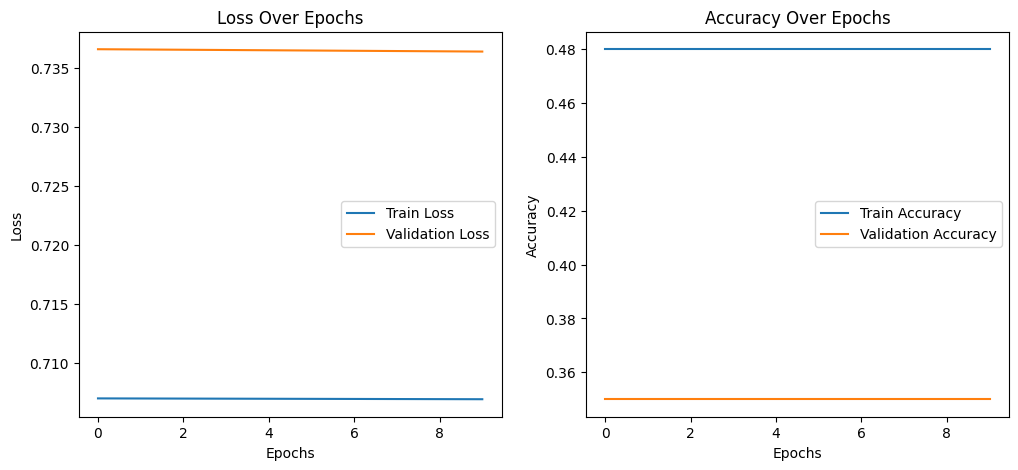

In [ ]:
import matplotlib.pyplot as plt

# Listas para almacenar pérdida y precisión
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 10
for epoch in range(epochs):
    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    outputs = model(train_data_class)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    # Calcular precisión en entrenamiento
    train_predictions = (outputs >= 0.5).float()
    train_accuracy = (train_predictions == train_labels).float().mean()

    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy.item())

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_data_class)
        val_loss = criterion(val_outputs, val_labels)

        # Calcular precisión en validación
        val_predictions = (val_outputs >= 0.5).float()
        val_accuracy = (val_predictions == val_labels).float().mean()

        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy.item())

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Train Acc: {train_accuracy.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy.item():.4f}")

# Graficar pérdida y precisión
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Over Epochs")

# Precisión
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.show()
